# Problem Set 12
## Fundamentals of Simulation Methods, WiSe 20/21
#### Author: Elias Olofsson
#### Date: 2021-02-15

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Produce inline vector graphics
%config InlineBackend.figure_format = 'svg'

In [2]:
# Import and extract data
data = np.load('output_task1.npz')
x = data['x']
v = data['v']

In [3]:
# Constants
pi      = np.pi
sigma   = 1./(pi**1.5)

# Parameters
gamma = 2      # Adiabatic index
K     = 0.1    # Pressure constant: P=K rho**gamma
h     = 0.1    # Kernel size
m     = 0.0025 # Particle mass

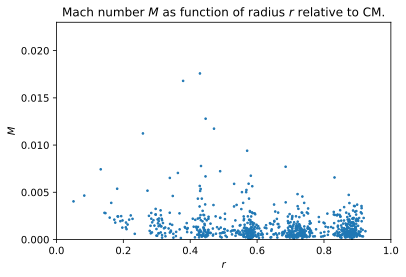

In [4]:
# Gaussian kernel to calculate density.
dr  = np.linalg.norm(x.T[:,None] - x.T, axis=2)
rho = 0.5*np.sum(m*sigma/h**3 * np.exp(-dr**2/h**2), axis=0)

# Calculate pressure and sound speed.
P   = K*rho**gamma         
cs  = np.sqrt(gamma*P/rho) 

# Mach number
M = np.linalg.norm(v, axis=0)/cs

# Center of mass, and radius relative to CM.
cm = np.mean(x, axis=1)
r  = np.linalg.norm((x-cm[:,None]), axis=0)

plt.scatter(r, M, marker='.', s=12)
plt.xlabel('$r$')
plt.ylabel('$M$')
plt.xlim(0,1)
plt.ylim(0,0.023)
plt.title('Mach number $M$ as function of radius $r$ relative to CM.')
plt.savefig('mach_radius.pdf')

In [5]:
# Approximate radius of the star
R = np.max(r)

# Dynamical time scale.
t_dyn  = R / np.mean(cs)                          

# Time scale for velocity fluctions to span the radius of the star.
t_span = R / np.mean(np.linalg.norm(v, axis=0))   

print(t_dyn)
print(t_span)
print(f'Fraction t_dyn/t_span: {t_dyn/t_span}')

3.589772627401937
2490.053305912593
Fraction t_dyn/t_span: 0.0014416448912471383


In [6]:
# Import and extract data
data2 = np.load('energy.npz')
E_rel = data2['E']
t     = data2['t']

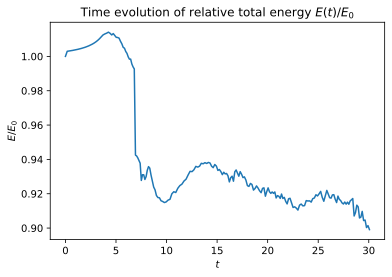

In [7]:
plt.plot(t,E_rel)
plt.xlabel('$t$')
plt.ylabel('$E/E_0$')
plt.title('Time evolution of relative total energy $E(t)/E_0$')
plt.savefig('energy_evo.pdf')